In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline

In [203]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is A0E8-ECE8

 Directory of C:\Users\saims\OneDrive\Desktop\CSE476-Machine-Learning-Lab

14-Jun-23  05:45 PM    <DIR>          .
14-Jun-23  05:45 PM    <DIR>          ..
14-Jun-23  12:03 PM    <DIR>          .ipynb_checkpoints
14-Jun-23  12:52 PM            15,464 00_LabelEncoder, OrdianlEncoder, OneHotEncoder.ipynb
14-Jun-23  06:24 AM            51,679 01_Logistic Regression.ipynb
14-Jun-23  01:04 AM            69,780 02_Support Vector Machine.ipynb
14-Jun-23  01:20 AM            91,769 03_Decision Tree.ipynb
14-Jun-23  06:35 AM           244,277 04_Random Forest.ipynb
14-Jun-23  05:45 PM           121,183 06_Confusion Matrix, Accuray, Recall, Precision, F1, FPR, TPR, ROC.ipynb
10-Sep-21  06:11 PM            35,921 heart.csv
19-Oct-19  07:24 PM        66,212,309 IMDB Dataset.csv
               8 File(s)     66,842,382 bytes
               3 Dir(s)  48,853,663,744 bytes free


In [204]:
# read the csv file

df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [206]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [207]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [208]:
X = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease

In [209]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [210]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [211]:
encoder = OrdinalEncoder()

In [212]:
X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [213]:
X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']] = encoder.fit_transform(X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [214]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0


In [215]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [217]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
X_train, X_test

(array([[0.60416667, 1.        , 0.33333333, ..., 0.        , 0.38636364,
         0.5       ],
        [0.22916667, 0.        , 0.66666667, ..., 0.        , 0.29545455,
         0.5       ],
        [0.625     , 1.        , 0.        , ..., 0.        , 0.29545455,
         1.        ],
        ...,
        [0.1875    , 1.        , 0.66666667, ..., 0.        , 0.69318182,
         0.        ],
        [0.64583333, 1.        , 0.33333333, ..., 1.        , 0.29545455,
         1.        ],
        [0.54166667, 1.        , 0.        , ..., 1.        , 0.61363636,
         0.5       ]]),
 array([[0.41666667, 1.        , 0.33333333, ..., 0.        , 0.29545455,
         1.        ],
        [0.77083333, 1.        , 0.        , ..., 1.        , 0.46590909,
         0.5       ],
        [0.54166667, 1.        , 0.        , ..., 1.        , 0.63636364,
         0.5       ],
        ...,
        [0.625     , 0.        , 0.66666667, ..., 0.        , 0.29545455,
         1.        ],
        [0.4

In [219]:
model = RandomForestClassifier(n_estimators=100)

In [220]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [221]:
y_pred = model.predict(X_test)

In [222]:
model.score(X_test, y_test)

0.8405797101449275

In [223]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 98,  32],
       [ 12, 134]], dtype=int64)

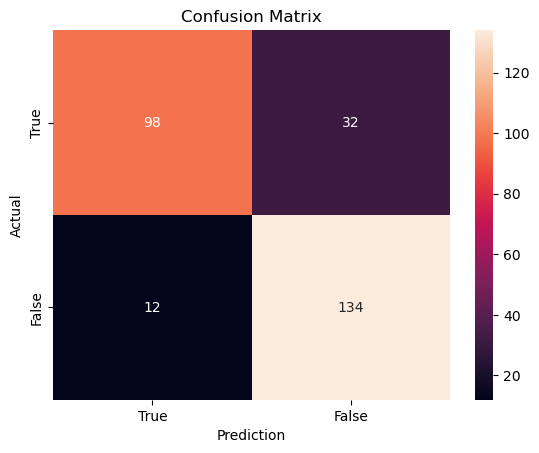

In [224]:
sns.heatmap(cm, 
            annot=True,
            fmt='.0f', 
            xticklabels=[True, False], 
            yticklabels=[True, False])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [225]:
accuracy_score(y_test, y_pred)

0.8405797101449275

In [226]:
recall_score(y_test, y_pred)

0.9178082191780822

In [227]:
precision_score(y_test, y_pred)

0.8072289156626506

In [228]:
f1_score(y_test, y_pred)

0.858974358974359

In [229]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       130
           1       0.81      0.92      0.86       146

    accuracy                           0.84       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



In [230]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [231]:
fpr

array([0.        , 0.24615385, 1.        ])

In [232]:
tpr

array([0.        , 0.91780822, 1.        ])

In [233]:
thresholds

array([2, 1, 0], dtype=int64)

In [234]:
roc_auc = roc_auc_score(y_test, y_pred)

In [235]:
roc_auc

0.8358271865121181

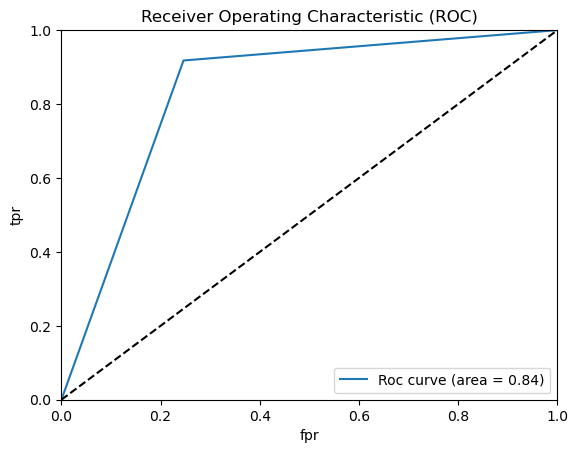

In [236]:
plt.plot(fpr,tpr, label='Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

In [237]:
# manually

In [244]:
tp = 98
tn = 134
fn = 32
fp = 12

tpr = tp*100/(tp+fn)
tpr

75.38461538461539

In [245]:
fpr = fp*100/(fp+tn)
fpr

8.219178082191782

In [246]:
accuracy = (tp+tn)*100/(tp+tn+fp+fn)
accuracy

84.05797101449275

In [247]:
recall = tpr
recall

75.38461538461539

In [248]:
precision = tp*100/(tp+fp)
precision

89.0909090909091

In [249]:
f1 = (2*accuracy*precision)/(accuracy+precision)
f1

86.50129356262364